# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 28th, 2021 at 23:59. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: BUKAYJ.)

In [5]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import scipy, pylab
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
import collections
import os
import datetime as dt
from scipy.stats import ttest_ind
import networkx as nx


# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

In [6]:
#Binning real numbers
mu, sigma = 2, 0.125 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)

In [7]:
histogram = np.histogram(s,10)
print(histogram)

(array([   5,   46,  246,  695, 1342, 1463,  860,  268,   69,    6],
      dtype=int64), array([1.51854165, 1.61361442, 1.7086872 , 1.80375997, 1.89883274,
       1.99390552, 2.08897829, 2.18405107, 2.27912384, 2.37419661,
       2.46926939]))


The numpy.historgram returns the values of the histogram and the bin edges. The bin edges will always be one longer (length = 11) than the histogram values (length = 10), since it has to define an interval for the number to be binned. Even for one value there will be two edges.

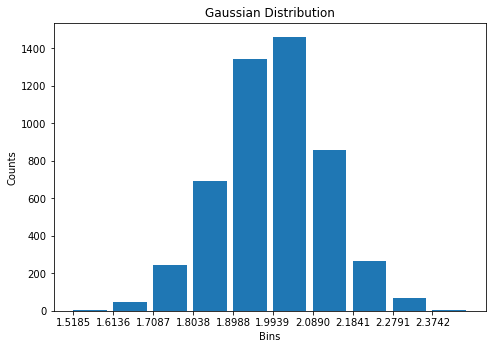

In [8]:
counts=histogram[0]
bins=histogram[1][:-1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(bins,counts,width = 0.08,align = 'edge')
plt.title('Gaussian Distribution')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.xticks(bins)
plt.show()

In order to plot the histogram the arrays have to be of the same length. The histogram functions creates one more bin than counts, since the bins are referring to intervals with a start and end. The last bin is therefore neglected and the bar is aligned from the left corner and the width is then adjusted to fit the following bin.

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [9]:
#Binning integers

In [10]:
pos_random=np.random.poisson(lam=10, size=5000)

print("The max and min numbers of the random 5000 generated numbers are:")

print(np.max(pos_random))
print(np.min(pos_random))

The max and min numbers of the random 5000 generated numbers are:
24
1


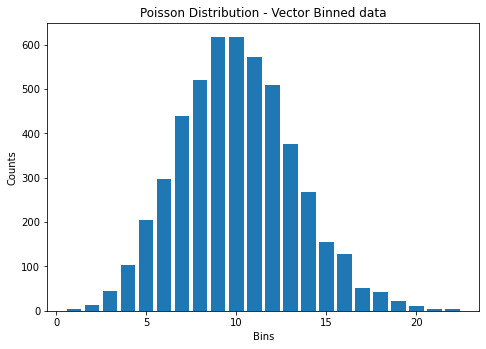

In [11]:
v=range(np.min(pos_random),np.max(pos_random))

histogram=np.histogram(pos_random, bins = v)

counts=histogram[0]
bins=histogram[1][:-1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(bins,counts)
plt.title('Poisson Distribution - Vector Binned data')
plt.xlabel('Bins')
plt.ylabel('Counts')

plt.show()

The sum over the bin count is the max number minus the min number plus one, since there are one more bin than counts.

The binning vector, v, is defined to have the first element equal the minimum number of the Poisson Distribution and the last element equal the maximum number. Since the numbers now are integers the bins are not represented as intervals.

In [12]:
#Binning and plotting degree distributions.

N=5000
k=10
p=k/(N-1)

print('The average degree, p, is:')
print(round(p,3))

The average degree, p, is:
0.002


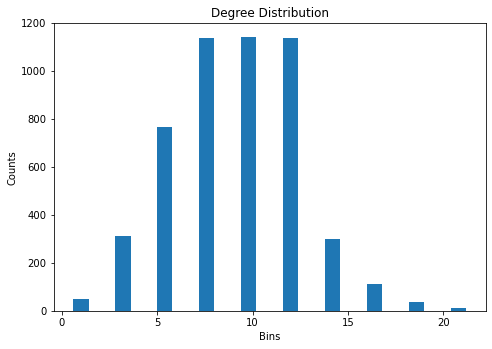

In [13]:
G= nx.erdos_renyi_graph(N,p)

degrees = [G.degree(n) for n in G.nodes()]

histogram=np.histogram(degrees)

counts=histogram[0]
bins=histogram[1][:-1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bins,counts)

plt.title('Degree Distribution')
plt.xlabel('Bins')
plt.ylabel('Counts')

plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

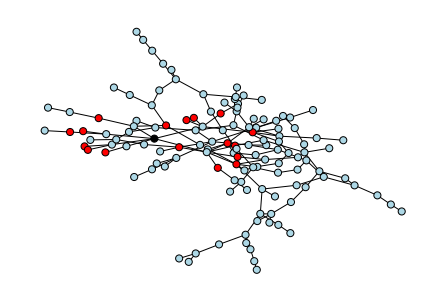

In [14]:
import networkx as nx
from random import choice
from random import sample

pos_random=np.random.poisson(lam=10, size=5000)

N=200
k=1.5
p=k/(N-1)

graph = nx.erdos_renyi_graph(N,p, seed=1)

connected_component_subgraphs = (graph.subgraph(c) for c in nx.connected_components(graph))

G = max(connected_component_subgraphs, key=len)


random_node = sample(list(G.nodes()), 1)

length_2=nx.single_source_shortest_path_length(G, random_node[0], cutoff=2)
length_1=nx.single_source_shortest_path_length(G, random_node[0], cutoff=1)

path_2=length_2.keys()
path_1=length_1.keys()

color_map = []
for node in G:
    
    if node == random_node[0]:
        color_map.append('black')
        
    elif node in path_1:
        color_map.append('lightblue')
        
    elif node in path_2:
        color_map.append('red')       
    else: 
        color_map.append('lightblue')

nodes= nx.draw(G, node_color=color_map, with_labels=False, node_size=50,edgecolors= 'black')
plt.show()


A random network of 200 nodes is shown above. The nodes has a average degree of 1.5, meaning that the average node is connected to 1.5 other nodes. A random node is coloured black, and it's neighboring nodes are coloured red. The rest of the nodes are light blue. 

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [15]:
N = 500
k = 4
p1 = 0
p2 = 0.1
p3 = 1

G1 = nx.watts_strogatz_graph(N, k, p1)
G2 = nx.watts_strogatz_graph(N, k, p2)
G3 = nx.watts_strogatz_graph(N, k, p3)

print('p(0):   '+str(nx.average_shortest_path_length(G1)))
print('p(0.1):   '+str(nx.average_shortest_path_length(G2)))
print('p(1):   '+str(nx.average_shortest_path_length(G3)))

p(0):   62.875751503006015
p(0.1):   7.7543967935871745
p(1):   4.777819639278557


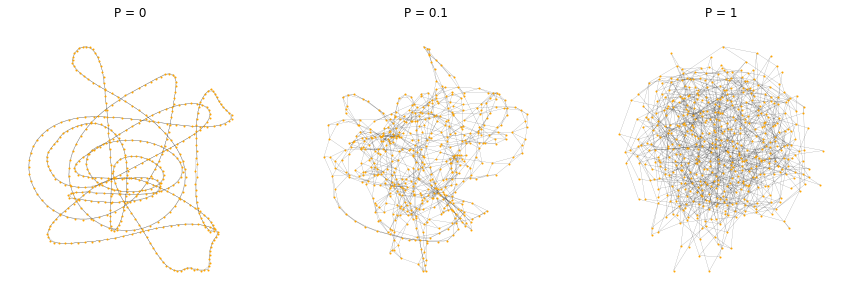

In [16]:
plt.figure(3, figsize=(15,5)) 
options = {
    'node_color': 'orange',
    'node_size': 1,
    'width': 0.1}

ax1 = plt.subplot(1,3,1)
nx.draw(G1,**options)
ax1.set_title('P = 0')

ax2 = plt.subplot(1,3,2)
nx.draw(G2,**options)
ax2.set_title('P = 0.1')


ax3 = plt.subplot(1,3,3)
nx.draw(G3,**options)
ax3.set_title('P = 1')

plt.show()

The rewiring probabilty, p, is the probability that a random pair of nodes will be rewired. When p is equal 1 the rewiring probabilty is 100 %. This is also shown in the plot, where as the p = 1 has a lot more random connected edges as the two others (p=0 and P=0.1). This means that the network is a lot more connected and the shortest average difference will therefore be a lot less for p=1.

In [17]:
N=500
k=4

p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

rows = 50
columns= 6

m=[]
ave_len = []
ave= []
std = []

for i in range(len(p)):
        for j in range(50):
            G=nx.watts_strogatz_graph(N, k, p[i])
            m.append(G)
            ave_len.append(nx.average_shortest_path_length(G))
        ave.append(np.mean(ave_len[-50:]))
        std.append(np.std(ave_len[-50:]))

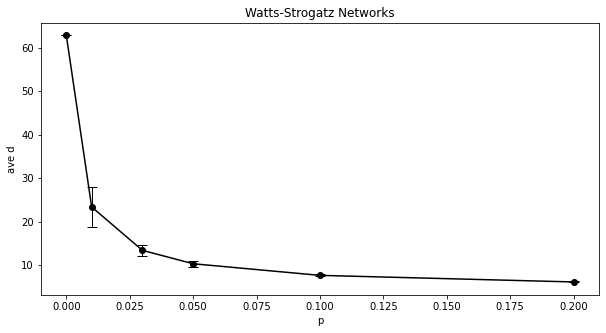

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(p, ave, yerr=std ,fmt='-o',color='black',  elinewidth = 1, capsize=5)
ax.set_xlabel('p')
ax.set_ylabel('ave d')
ax.set_title('Watts-Strogatz Networks')

plt.show()

The average shortest path length decrease exponentially with increasing rewiring probabilty. The reason for this is described above. 

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

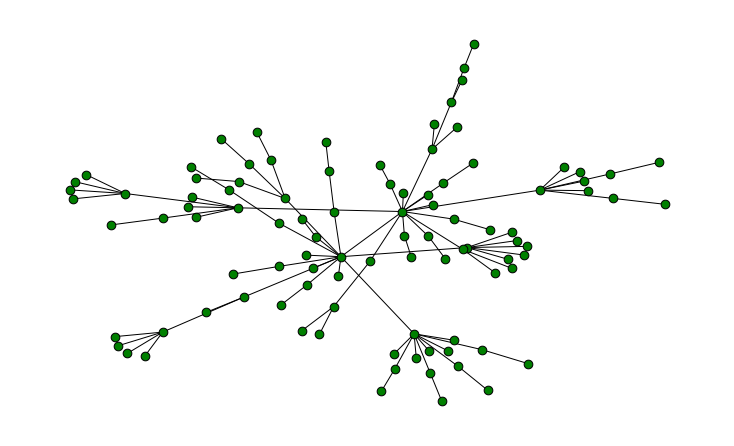

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

G = nx.Graph()
G.add_edge(1,2)

for i in range(100-2):
    G.add_node(i)
    
    edges1=list(G.edges)
    edgesflat= []

    for sublist in edges1:
        for item in sublist:
            edgesflat.append(item)
            
    G.add_edge(random.choice(edgesflat),i)

plt.figure(figsize=(10,6))

nx.draw(G, with_labels=False, node_size=75, node_color = 'green', edgecolors= 'black')

plt.show()

The network above show the BA model used to generate 100 nodes. It is generated by taking one link, and then simply adding new nodes to one of the excisting nodes in proportion to their degree, until the network has 100 nodes.

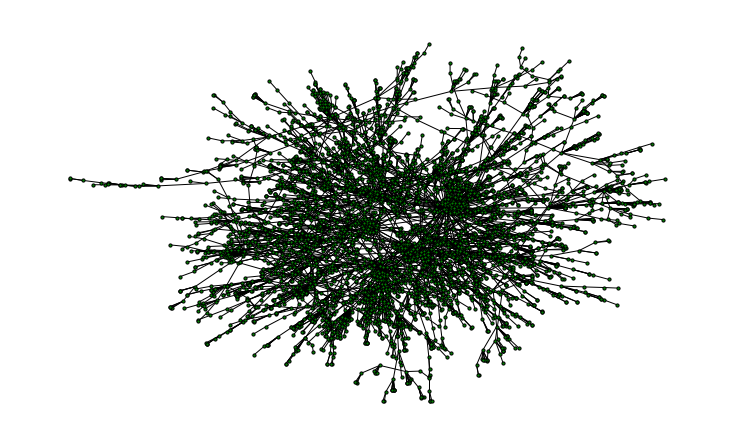

In [20]:
G = nx.Graph()
G.add_edge(1,2)

for i in range(5000-2):
    G.add_node(i)
    
    edges1=list(G.edges)
    edgesflat= []

    for sublist in edges1:
        for item in sublist:
            edgesflat.append(item)
            
    G.add_edge(random.choice(edgesflat),i)

# plt.figure(figsize=(10,6))

# nx.draw(G, with_labels=False, node_size=10, node_color = 'green', edgecolors= 'black')

# plt.show()

In [21]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

dmax = max(degree_sequence)
dmin = min(degree_sequence)

print('Max degree:', dmax, 'and the min degree:', dmin)

Max degree: 178 and the min degree: 1


In [22]:
bins = list(range(1, dmax))
hist, bins = np.histogram(degree_sequence, bins=bins) 
hist_log=np.log(hist)
bins_log=np.log(bins)

C:\Users\Bruger\AppData\Local\Temp/ipykernel_14168/3171615718.py:3: RuntimeWarning: divide by zero encountered in log
  hist_log=np.log(hist)


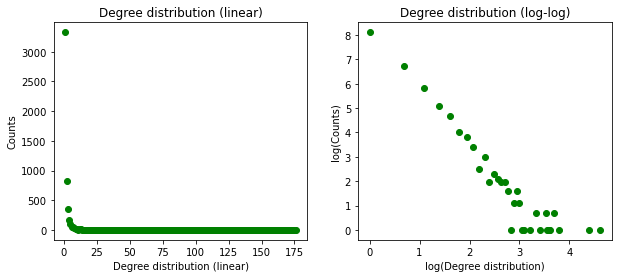

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].scatter(x = bins[:-1], y = hist, color = 'green')
ax[0].set_xlabel("Degree distribution (linear)")
ax[0].set_ylabel("Counts")
ax[0].set_title("Degree distribution (linear)")


ax[1].scatter(x = bins_log[:-1], y = hist_log, color = 'green')
ax[1].set_xlabel("log(Degree distribution)")
ax[1].set_ylabel("log(Counts)")
ax[1].set_title("Degree distribution (log-log)")

plt.show()

The linear degree distribution show that there is a very high amount of counts to a small number of nodes and for then a very small amount for the remaining nodes. This makes sense since the initial nodes have a lot higher chance of connecting to new nodes, as there only is a small amount in the beginning and then the chances decreases for every new node.
The log-log degree distribution show a logarithmic relationship between the degree distribution and the counts. 

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [24]:
from random import choice
from random import sample

truth=[]

for i in range(1000):
    
    random_node = sample(list(G.nodes()), 1)
    random_deg = G.degree[random_node[0]]
    neighbors = [n for n in G.neighbors(random_node[0])]
    
    neighbor_deg=[]
    
    for j in range(len(neighbors)):
        neighbor_deg.append(G.degree[neighbors[j]])
    
    truth.append(np.mean(neighbor_deg)>random_deg)
    
print("Amount of true samples of 1000 total is: "+str(truth.count(True)) +" true")

Amount of true samples of 1000 total is: 860 true


Out of 1000 samples, 862 of them  were true. This is arguably not 'almost everyone', but that maybe right on average.

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [29]:
G1 = nx.Graph()

G1.add_edge(1,2)

for i in range(5000-2):

    nodes=list(G1.nodes)

    G1.add_edge(random.choice(nodes), i)

In [30]:
from random import choice
from random import sample

truth=[]

for i in range(1000):
    
    random_node = sample(list(G1.nodes()), 1)
    random_deg = G1.degree[random_node[0]]
    neighbors = [n for n in G1.neighbors(random_node[0])]
    
    neighbor_deg=[]
    
    for j in range(len(neighbors)):
        neighbor_deg.append(G1.degree[neighbors[j]])
    
    truth.append(np.mean(neighbor_deg)>random_deg)

In [27]:
print("Amount of true samples of 1000 total is: "+str(truth.count(True)) +" true")

Amount of true samples of 1000 total is: 706 true


C:\Users\Bruger\AppData\Local\Temp/ipykernel_14168/1875539426.py:8: RuntimeWarning: divide by zero encountered in log
  hist_log=np.log(hist)


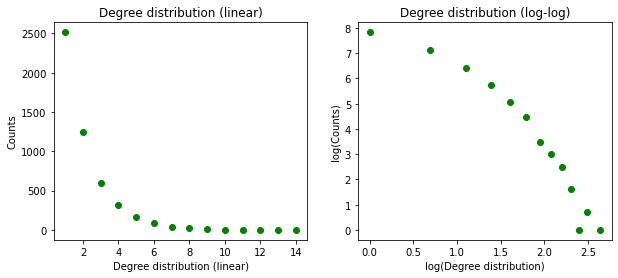

In [28]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)

dmax = max(degree_sequence)
dmin = min(degree_sequence)

bins = list(range(1, dmax))
hist, bins = np.histogram(degree_sequence, bins=bins) 
hist_log=np.log(hist)
bins_log=np.log(bins)

fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].scatter(x = bins[:-1], y = hist, color = 'green')
ax[0].set_xlabel("Degree distribution (linear)")
ax[0].set_ylabel("Counts")
ax[0].set_title("Degree distribution (linear)")


ax[1].scatter(x = bins_log[:-1], y = hist_log, color = 'green')
ax[1].set_xlabel("log(Degree distribution)")
ax[1].set_ylabel("log(Counts)")
ax[1].set_title("Degree distribution (log-log)")

plt.show()

The Erdos-Renyi network is more equal distributed network, as the connections are created randomly. Whereas the Barabasi-Albert Model is creating each connection based upon the links in the network. This will create hubs, since there will be a higher chance for a node with many links to connect to a new node. 
This is seen in the degree function as the node with the most links are higher in the BA-network. The node with the second highest degree has in the BA network only a 4th (800) of the node with the higest degree (3200), whereas in the ER network the node with the highest degree has 2500 and the second highest has 750, which is half. 

The friendship paradox is therefore more likely to me true in the BA-netork as there are more large hubs, which follow the hypothesis of the paradox. And the ER-network is less likely as it is more even. This is also confirmed in the lower "true" samples. ER: 706 true and BA: 860 true of 1000 samples.